In [69]:
import pandas as pd



In [70]:
df = pd.read_csv('insurance.csv')

In [71]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [72]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Предобработка

In [74]:
df['sex'] = df.apply(lambda r: int(r.sex=='male'), axis=1)
df['smoker'] = df.apply(lambda r: int(r.smoker=='yes'), axis=1)
df = pd.concat([df, pd.get_dummies(df['region'], dtype=int)], axis=1)
df.drop(['region', 'children'], axis=1, inplace=True)

In [102]:
df.head()

,age,sex,bmi,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,1,16884.92400,0,0,0,1
1,18,1,33.770,0,1725.55230,0,0,1,0
2,28,1,33.000,0,4449.46200,0,0,1,0
3,33,1,22.705,0,21984.47061,0,1,0,0
4,32,1,28.880,0,3866.85520,0,1,0,0


## Визуализация

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>,
        <Axes: title={'center': 'northeast'}>],
       [<Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>,
        <Axes: title={'center': 'southwest'}>]], dtype=object)

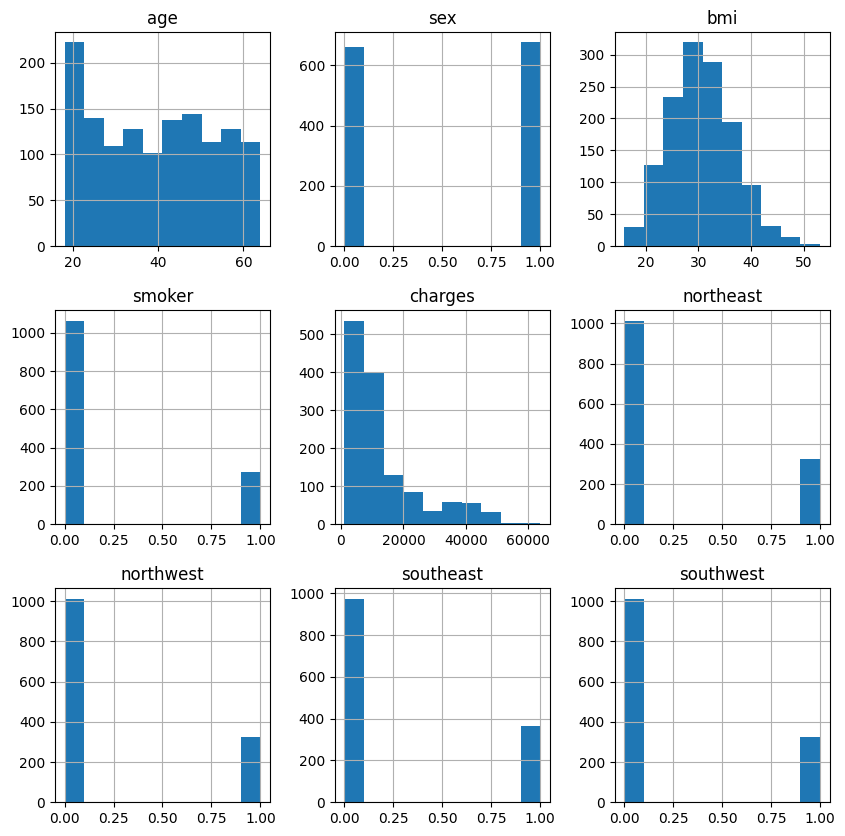

In [79]:
df.hist(figsize=(10,10))

<Axes: >

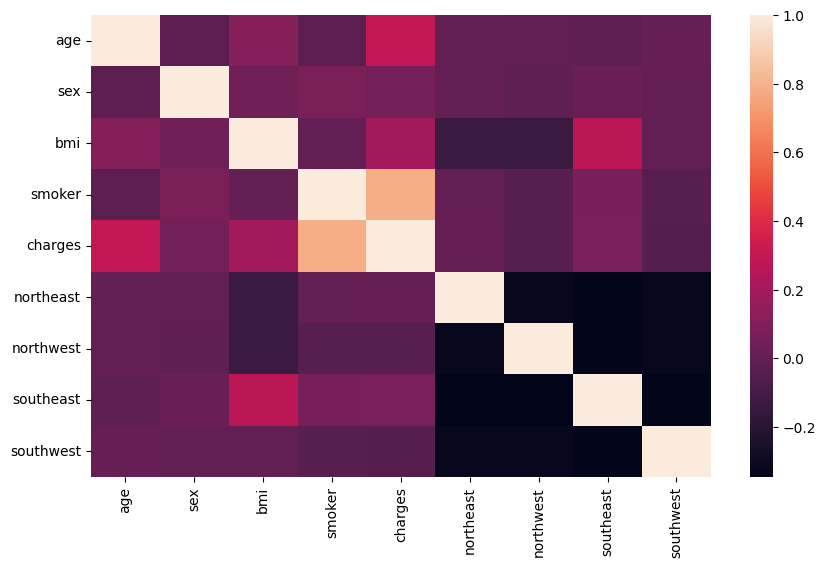

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

## Масштабирование и обучение

In [81]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [82]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99
)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error, r2_score


In [92]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mae: ', mean_absolute_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mae:  4398.017012337861
r2 score:  0.7235881803109511


In [91]:
ridge = Ridge(0.1)
ridge.fit(X_train, y_train)
print('\n r2 score ridge: ', r2_score(y_test, ridge.predict(X_test)))
print('test mae ridge: ', mean_absolute_error(y_test, ridge.predict(X_test)))

lasso = Lasso(0.1)
lasso.fit(X_train, y_train)
print('\n r2 score lasso: ', r2_score(y_test, lasso.predict(X_test)))
print('test mae lasso: ', mean_absolute_error(y_test, lasso.predict(X_test)))


 r2 score ridge:  0.7235961179201977
test mae ridge:  4398.072600036473

 r2 score lasso:  0.7235900763809225
test mae lasso:  4397.980429861971


d:\Apps\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.589e+07, tolerance: 1.387e+07
  model = cd_fast.enet_coordinate_descent(


In [101]:
from sklearn.model_selection import cross_validate
cross_validate(regressor, X, y, cv=10)['test_score']



array([0.78942899, 0.7301868 , 0.73138065, 0.67553604, 0.77141252,
       0.77446114, 0.78871359, 0.6669589 , 0.74691541, 0.75526337])